In [1]:
import hmclab
import numpy, matplotlib.pyplot as plt

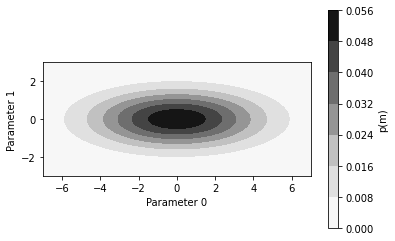

In [105]:
ElongatedNormal_2d = hmclab.Distributions.Normal([0, 0], [3**2, 1**2])

domain = [-7, 7, -3, 3]

x1s = numpy.linspace(domain[0], domain[1], 100)
x2s = numpy.linspace(domain[2], domain[3], 100)

grid = numpy.stack(numpy.meshgrid(x1s, x2s))

background_image = numpy.empty_like(grid[0, :, :])

for ix1 in range(100):
    for ix2 in range(100):
        background_image[ix1, ix2] = ElongatedNormal_2d.misfit(grid[:, ix1, ix2, None])


background = (x1s, x2s, background_image)

plt.figure()
ax = plt.gca()
plt.contourf(
    x1s,
    x2s,
    numpy.exp(-background_image)
    / numpy.sum(numpy.exp(-background_image) * (x1s[1] - x1s[0]) * (x2s[1] - x2s[0])),
    cmap=plt.get_cmap("Greys"),
)
plt.gca().set_aspect(1)
plt.xlabel("Parameter 0")
plt.ylabel("Parameter 1")
cbar = plt.colorbar()
_ = cbar.ax.set_ylabel("p(m)")
plt.show()

Although the HMC algorithm would sample this distribution rather easily, performance is affected by the elongation. This is becauseto traverse to long axis, more oscillations in the short axis are needed. This is shown below.

In [106]:
sampler_lf = hmclab.Samplers.HMC(seed=78)

### Tuning parameters -------------
stepsize = 0.2
amount_of_steps = 60
proposals = 3000
randomize_stepsize = True
### -------------------------------

sampler_lf.sample(
    "bin_samples/tutorial_7_samples_lf.h5",
    ElongatedNormal_2d,
    stepsize=stepsize,
    randomize_stepsize=randomize_stepsize,
    amount_of_steps=amount_of_steps,
    proposals=proposals,
    autotuning=True,
    overwrite_existing_file=True,
)

Tot. acc rate: 0.65. Progress: 100%|██████████| 3000/3000 [00:00<00:00, 3197.09it/s]


In [107]:
sampler_3s = hmclab.Samplers.HMC(seed=78)

### Tuning parameters -------------
stepsize = 5.0
amount_of_steps = 18
proposals = 3000
randomize_stepsize = True
### -------------------------------

sampler_3s.sample(
    "bin_samples/tutorial_7_samples_3s.h5",
    ElongatedNormal_2d,
    stepsize=stepsize,
    randomize_stepsize=randomize_stepsize,
    amount_of_steps=amount_of_steps,
    proposals=proposals,
    autotuning=True,
    overwrite_existing_file=True,
    integrator="3s",
)

Tot. acc rate: 0.65. Progress: 100%|██████████| 3000/3000 [00:00<00:00, 3198.94it/s]


In [108]:
sampler_4s = hmclab.Samplers.HMC(seed=78)

### Tuning parameters -------------
stepsize = 5.0
amount_of_steps = 13
proposals = 3000
randomize_stepsize = True
### -------------------------------

sampler_4s.sample(
    "bin_samples/tutorial_7_samples_4s.h5",
    ElongatedNormal_2d,
    stepsize=stepsize,
    randomize_stepsize=randomize_stepsize,
    amount_of_steps=amount_of_steps,
    proposals=proposals,
    autotuning=True,
    overwrite_existing_file=True,
    integrator="4s",
)

Tot. acc rate: 0.66. Progress: 100%|██████████| 3000/3000 [00:00<00:00, 3306.96it/s]


In [109]:
samples_lf = sampler_lf.load_results()
samples_3s = sampler_3s.load_results()
samples_4s = sampler_4s.load_results()

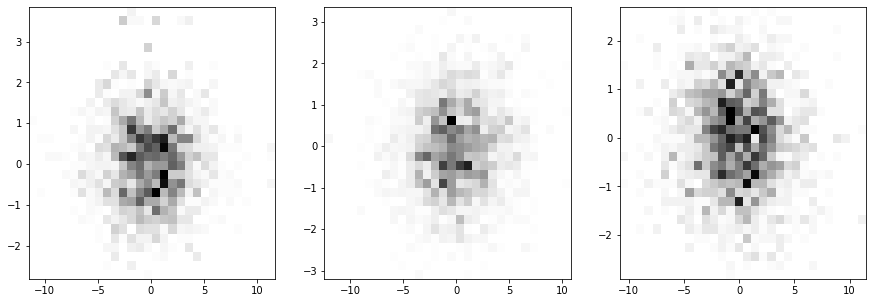

In [110]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
_ = plt.hist2d(
    samples_lf[0, :],
    samples_lf[1, :],
    bins=30,
    density=True,
    cmap=plt.get_cmap("Greys"),
)
plt.subplot(132)
_ = plt.hist2d(
    samples_3s[0, :],
    samples_3s[1, :],
    bins=30,
    density=True,
    cmap=plt.get_cmap("Greys"),
)
plt.subplot(133)
_ = plt.hist2d(
    samples_4s[0, :],
    samples_4s[1, :],
    bins=30,
    density=True,
    cmap=plt.get_cmap("Greys"),
)

(0.008, 7)

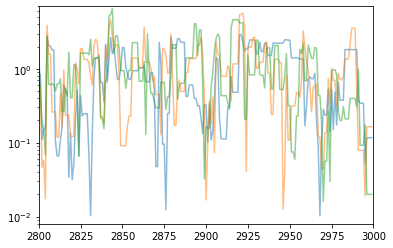

In [111]:
plt.semilogy(samples_lf[-1,:], alpha=0.5)
plt.semilogy(samples_3s[-1,:], alpha=0.5)
plt.semilogy(samples_4s[-1,:], alpha=0.5)
plt.xlim([2800, 3000])
plt.ylim([8e-3,7])

(0.0, 100.0)

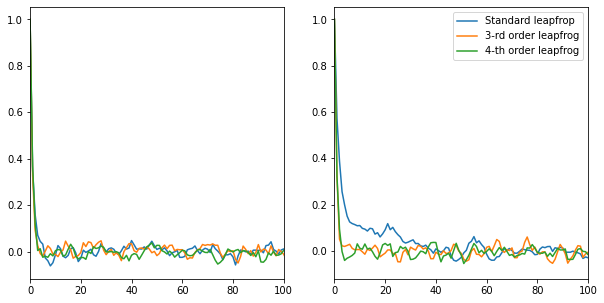

In [112]:
def autocorr(x):
    x=x.copy()
    x -= x.mean()
    result = numpy.correlate(x, x, mode="full")
    result = result[int(result.size / 2) :]
    result /= result.max()
    return result

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(autocorr(samples_lf[0, :]), label="Standard leapfrop")
plt.plot(autocorr(samples_3s[0, :]), label="3-rd order leapfrog")
plt.plot(autocorr(samples_4s[0, :]), label="4-th order leapfrog")
plt.xlim([0,100])
plt.subplot(122)
plt.plot(autocorr(samples_lf[1, :]), label="Standard leapfrop")
plt.plot(autocorr(samples_3s[1, :]), label="3-rd order leapfrog")
plt.plot(autocorr(samples_4s[1, :]), label="4-th order leapfrog")
plt.legend()
plt.xlim([0,100])